# The Uniform Distribution

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
uniform_data = stats.uniform.rvs(size = 100000, # generate 1000000
                                loc = 0, # From 0
                                scale = 10 # To 10 
                                )

<AxesSubplot:ylabel='Density'>

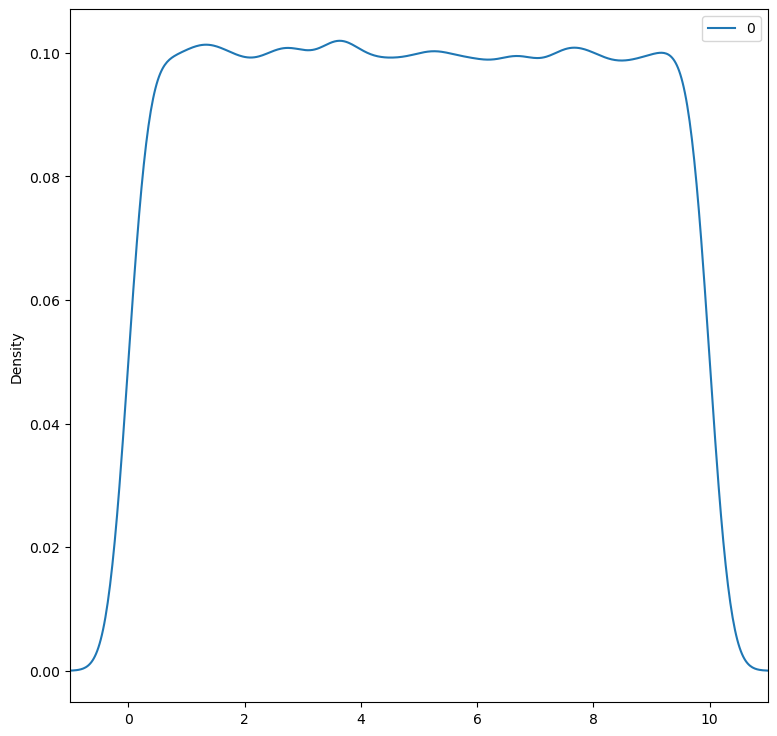

In [5]:
pd.DataFrame(uniform_data).plot(kind="density", # plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11))

In [6]:
stats.uniform.cdf(x=2.5, loc = 0, scale = 10)

0.25

In [7]:
stats.uniform.ppf(q=0.4, loc = 0, scale = 10)

4.0

In [8]:
for x in range(-1, 12, 3):
    print("Density at x value " + str(x))
    print(stats.uniform.pdf(x, loc = 0, scale = 10))

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


# Generating Random Numbers and Setting The Seed

In [9]:
import random

random.randint(0,10)

4

In [10]:
random.choice([2,4,6,9])

2

In [11]:
random.random() # get a real number between 0 and 1

0.3504885697377583

In [12]:
random.uniform(0,10) # get a real in the specified range

0.21321341081551703

In [13]:
random.seed(12) # set the seed to an arbitrary value
print([random.uniform(0, 10) for x in range(4)])
random.seed(12) # set the seed to the same value
print([random.uniform(0,10) for x in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]
[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


# The Normal Distribution

In [14]:
prob_under_minus1 = stats.norm.cdf(x = -1, loc = 0, scale = 1)
prob_over_1 = 1 - stats.norm.cdf(x = 1, loc = 0, scale = 1)
between_prob = 1 - (prob_under_minus1 + prob_over_1)
print(prob_under_minus1, prob_over_1, between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


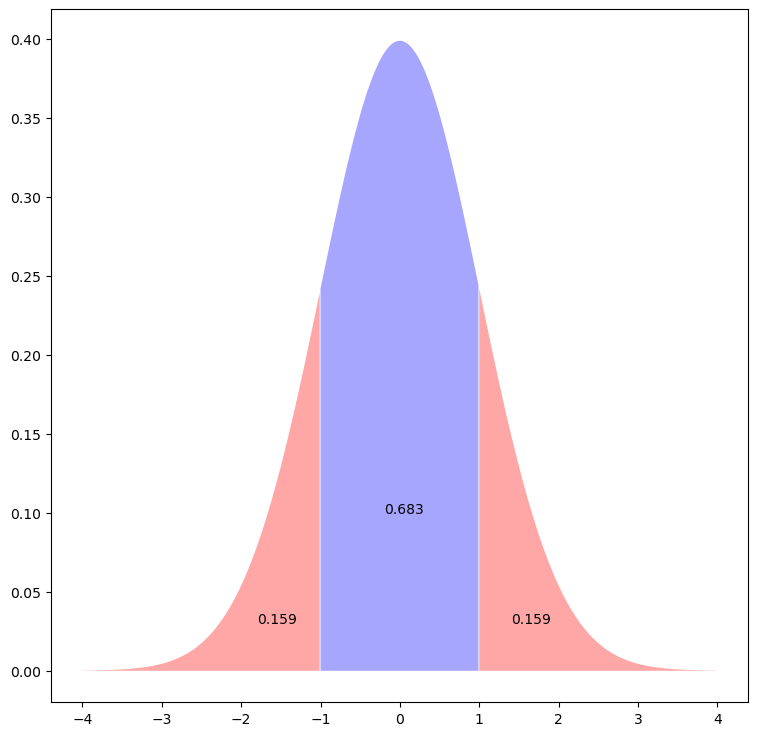

In [15]:
# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (9,9)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

In [16]:
print( stats.norm.ppf(q=0.025) ) # Find the quantile for the 2.5% cutoff

print( stats.norm.ppf(q=0.975) ) # Find the quantile for the 97.5% cutoff

-1.9599639845400545
1.959963984540054


# The Binomial Distribution

col_0   0   1    2     3     4     5     6     7    8    9   10
row_0                                                          
counts   8  77  457  1149  2055  2463  2069  1191  416  105  10


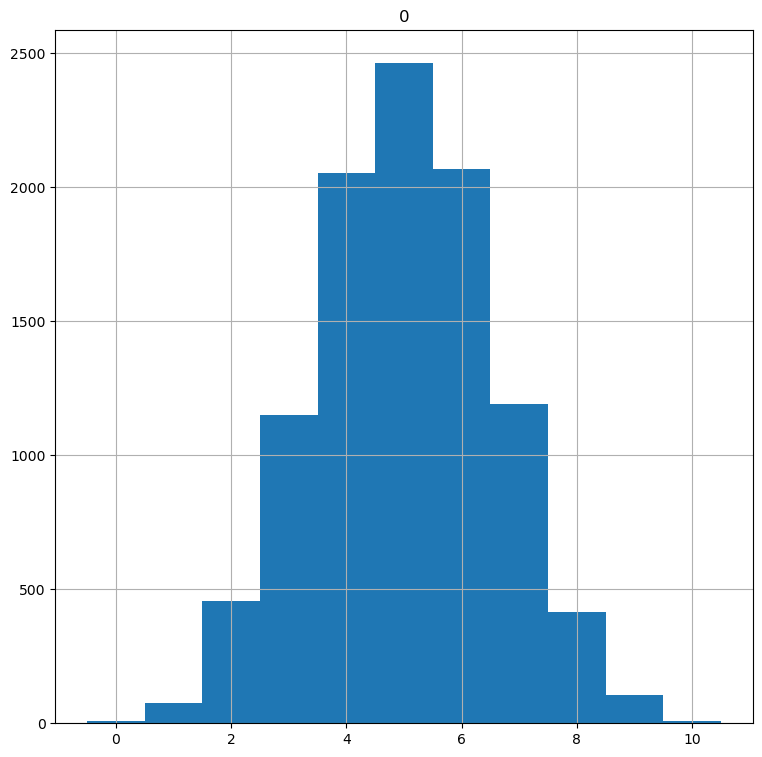

In [17]:
fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials

print( pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11);

col_0   2   3   4    5    6     7     8     9     10
row_0                                               
counts   1   8  47  256  850  2007  3059  2694  1078


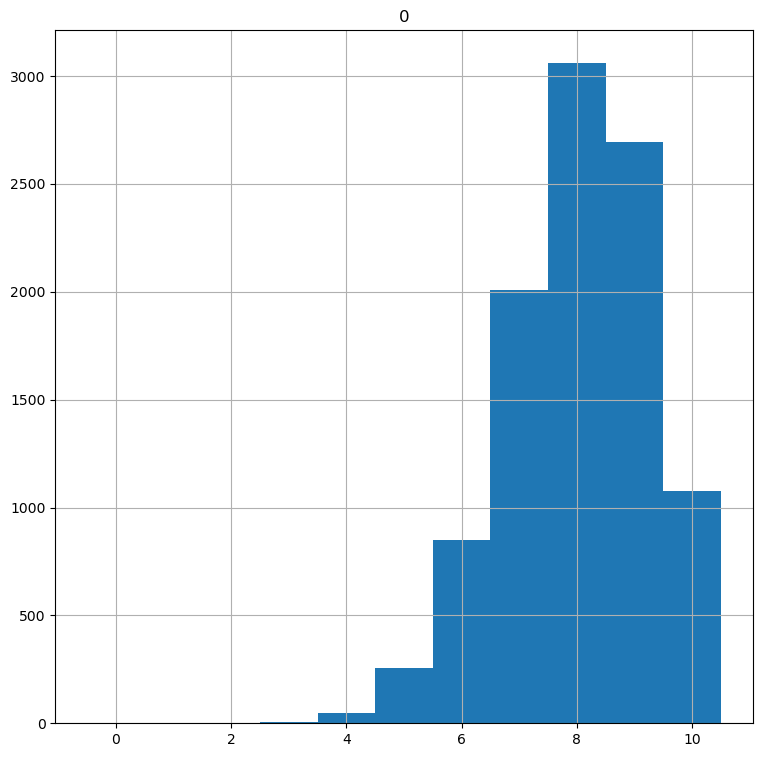

In [18]:
biased_coin_flips = stats.binom.rvs(n=10,      # Number of flips per trial
                                  p=0.8,       # Success probability
                                  size=10000)  # Number of trials

# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11);

In [19]:
stats.binom.cdf(k=5,        # Probability of k = 5 successes or less
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.03279349759999997

In [20]:
1 - stats.binom.cdf(k=8,        # Probability of k = 9 successes or more
                    n=10,       # With 10 flips
                    p=0.8)      # And success probability 0.8

0.37580963840000015

In [21]:
stats.binom.pmf(k=5,        # Probability of k = 5 successes
                n=10,       # With 10 flips
                p=0.5)      # And success probability 0.5

0.24609375000000003

In [22]:
stats.binom.pmf(k=8,        # Probability of k = 8 successes
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8


0.30198988799999993

# The Geometric and Exponential Distributions

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13  15
row_0                                                                  
counts  5049  2494  1226  614  300  166  76  35  16   9   5   6   2   2


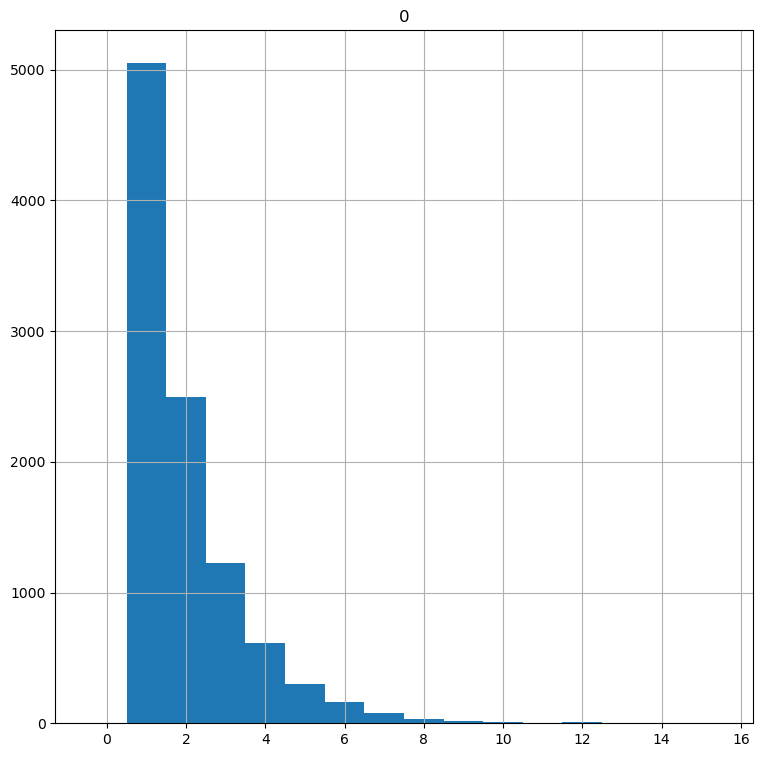

In [23]:
random.seed(12)

flips_till_heads = stats.geom.rvs(size=10000,  # Generate geometric data
                                  p=0.5)       # With success prob 0.5

# Print table of counts
print( pd.crosstab(index="counts", columns= flips_till_heads))

# Plot histogram
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1);

In [24]:
first_five = stats.geom.cdf(k=5,   # Prob of success in first 5 flips
                           p=0.5)

1 - first_five

0.03125

In [25]:
stats.geom.pmf(k=2,   # Prob of needing exactly 2 flips to get first success
              p=0.5)

0.25

In [26]:
# Get the probability of waiting more than 1 time unit before a success

prob_1 = stats.expon.cdf(x=1,        
                         scale=1)  # Arrival rate

1 - prob_1

0.36787944117144233

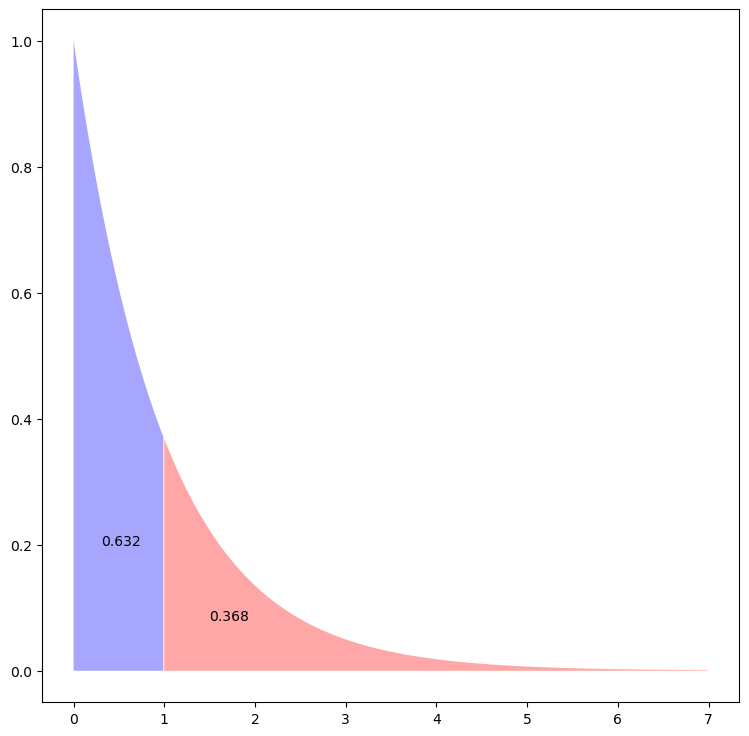

In [27]:
plt.fill_between(x=np.arange(0,1,0.01), 
                 y1= stats.expon.pdf(np.arange(0,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,7,0.01), 
                 y1= stats.expon.pdf(np.arange(1,7,0.01)) ,
                 facecolor='red',
                 alpha=0.35)


plt.text(x=0.3, y=0.2, s= round(prob_1,3))
plt.text(x=1.5, y=0.08, s= round(1 - prob_1,3));

# The Poisson Distribution

col_0      0     1     2    3    4   5  6  7
row_0                                       
counts  3691  3646  1868  604  154  27  9  1


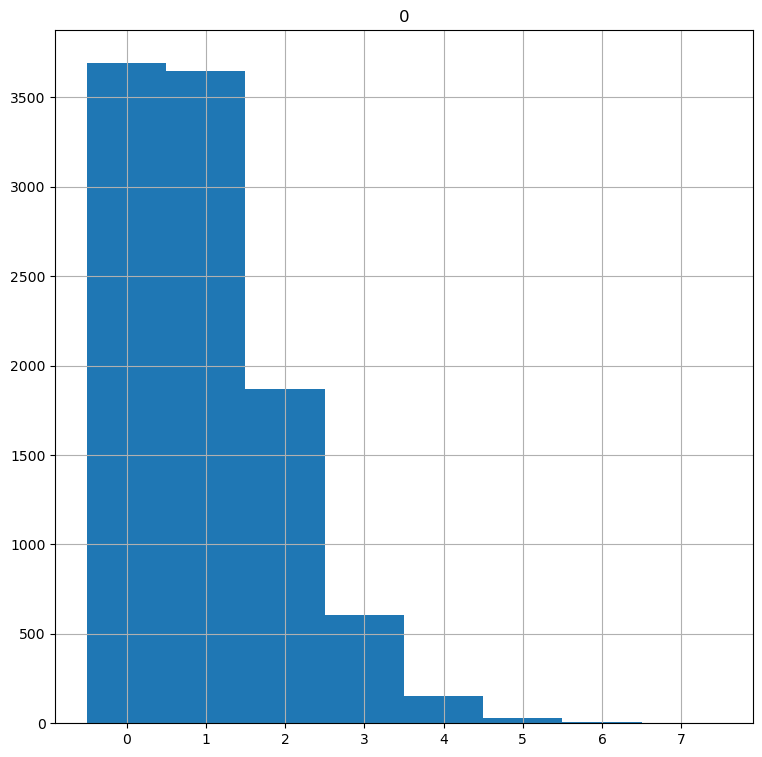

In [28]:
random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

# Plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1);

col_0   1   2   3    4    5    6    7     8     9     10  ...   16   17  18  \
row_0                                                     ...                 
counts   2  27  79  199  359  604  951  1071  1238  1289  ...  219  126  67   

col_0   19  20  21  22  23  24  28  
row_0                               
counts  49  22  12   3   2   1   1  

[1 rows x 25 columns]


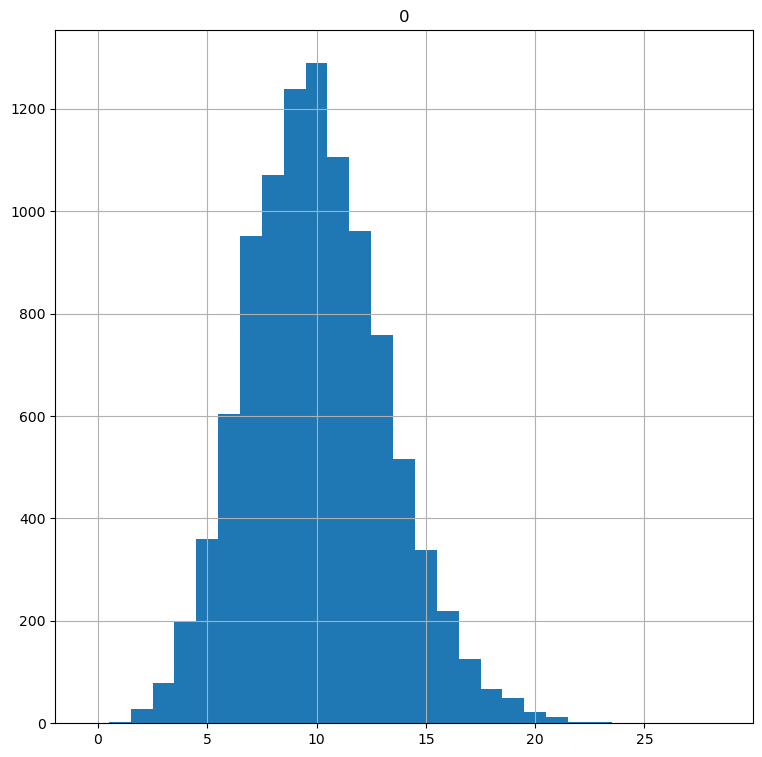

In [29]:
random.seed(12)

arrival_rate_10 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=10 )       # Average arrival time 10

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_10))

# Plot histogram
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5)
                                    , bins=max(arrival_rate_10)+1);

In [30]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10

0.06708596287903189

In [31]:
stats.poisson.pmf(k=10,     # Check the prob f exactly 10 arrivals
                  mu=10)    # With arrival rate 10

0.12511003572113372